In [2]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

img_size = 224
new_model = tf.keras.models.load_model("my_model2.h5")

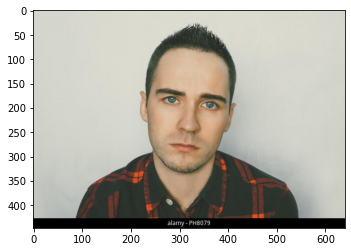

In [3]:
img = cv2.imread('sadopen2.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

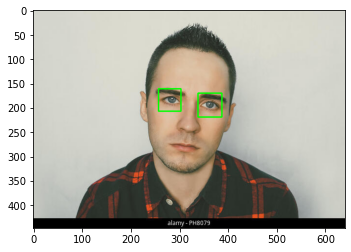

In [4]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_forntalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for(x,y,w,h) in eyes:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0),2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


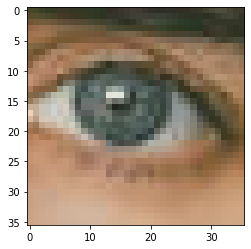

In [5]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("eyes are not detected")
    else:
        for (ex,ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey: ey+eh, ex:ex+ew]

plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [6]:
eyes_roi.shape

final_image = cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims(final_image,axis = 0)
final_image = final_image/255.0

new_model.predict(final_image)

array([[16.463284]], dtype=float32)

In [8]:
import cv2

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0),2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("eyes are not detected")
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex:ex+ew]
                
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image, axis = 0)
    final_image = final_image/255.0
    
    Predictions = new_model.predict(final_image)
    if (Predictions>0):
        status = "Open Eyes"
    else:
        status = "Closed Eyes"
    
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    
    #Draw rectangle around the faces
    for(x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0),2)
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    #Use putText() method for
    #inserting text on video
    cv2.putText(frame,
               status,
               (50,50),
               font, 3,
               (0, 0, 255),
               2,
               cv2.LINE_4)
    cv2.imshow('Drowsiness Detection Program',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

False
False
eyes are not detected
False
False
eyes are not detected
False
False
False
eyes are not detected
False
eyes are not detected
False
False
False
False
False
False
False
False
False
False
False
False
False
False
eyes are not detected
False
False
False
False
eyes are not detected
False
False
False
False
False
eyes are not detected
False
eyes are not detected
False
eyes are not detected
False
eyes are not detected
False
eyes are not detected
False
eyes are not detected
False
False
False
eyes are not detected
False
eyes are not detected
False
False
False
False
False
False
False
False
False
False
False
False
False
eyes are not detected
False
False
False
eyes are not detected
False
eyes are not detected
False
eyes are not detected
False
eyes are not detected
False
eyes are not detected
False
eyes are not detected
False
eyes are not detected
False
eyes are not detected
False
eyes are not detected
eyes are not detected
False
eyes are not detected
eyes are not detected
eyes are not det

In [14]:
import winsound

frequency = 2500 # Set Frequency
duration = 1000

import cv2

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
counter = 0
while True:
    ret,frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0),2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("eyes are not detected")
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex:ex+ew]
                
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image, axis = 0)
    final_image = final_image/255.0
    
    Predictions = new_model.predict(final_image)
    if (Predictions>0):
        status = "Open Eyes"
        cv2.putText(frame,status,
                    (150,150),
                   font, 3, 
                   (0,255,0),
                   2,cv2.LINE_4)
        x1,y1,w1,h1 = 0,0,175,75  # Draw black rectangle
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1),(0,0,0), -1)
        cv2.putText(frame, 'Active',(x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        
    else:
        counter = counter + 1
        status = "Closed Eyes"
        cv2.putText(frame,status,
                    (150,150),
                   font, 3, 
                   (0,255,0),
                   2,cv2.LINE_4)
        x1,y1,w1,h1 = 0,0,175,75  # Draw black rectangle
        cv2.rectangle(frame, (x1,y1), (x1+w1, y1+h1), (0,0,255), 2)
    
        if counter>5:
            x1,y1,w1,h1 = 0,0,175,75
            cv2.rectangle(frame,(x1, x1), (x1+w1,y1+h1), (0,0,0), -1) #Black Rectangle
            cv2.putText(frame, 'Sleep Alert !!',(x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
            winsound.Beep(frequency,duration)
            counter = 0
    
    cv2.imshow('Drowsiness Detection Program',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are n

In [13]:
new_model.save("model/2")

INFO:tensorflow:Assets written to: model/2\assets
